# Double Pendulum using Lagrange Equations
Uses a Double Pendulum Class to create the two pendula and describe their motion based on Lagrange Equations

## Lagrange Equation
The Lagrangian for the double pendulum is as follows:
$\begin{align}
  \mathcal{L} = \frac12 m_1(L_1+\dot\theta_1^2+\frac12 m_2 (L1 \dot\theta)^2 + (L_2 \dot\theta)^2 + 2 L_1 L_2 \dot\theta_1 \dot\theta_2 \cos(\theta_1 - \theta_2) - (m1+m2) L_1 g \cos(\theta_1)-m_2 L_2 g \cos(\theta_2) 
\end{align}$

## Euler-Lagrange Equation
The Euler Lagrange is:
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\theta_1} = \frac{\partial\mathcal L}{\partial\theta_1}
 \quad\Longrightarrow\quad
 \ddot\theta_1 = \frac{m_2 g \sin(\theta_2) \cos(\theta_1-\theta_2) - m_2 \sin(\theta_1-\theta_2) (L_1 \dot\theta_1^2 \cos(\theta_1-\theta_2) + L_2 \dot\theta_2^2) - (m_1 + m_2) g \sin(\theta_1)}{L_1 (m_1 + m_2 \sin(\theta_1-\theta_2)^2)}
\end{align}$
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\theta_2} = \frac{\partial\mathcal L}{\partial\theta_2}
 \quad\Longrightarrow\quad
 \ddot\theta_2 = \frac{(m_1+m_2) (L_1 \dot\theta_2^2 \sin(\theta_1-\theta_2) - g \sin(\theta_2) + g \sin(\theta_1) \cos(\theta_1-\theta_2)) + m_2 L_2 \dot\theta_2^2 \sin(\theta_1-\theta_2) \cos(\theta_1-\theta_2)}{(m_1 + m_2 \sin(\theta_1-\theta_2)^2}
\end{align}$

With these equations, we can make our pendulum!

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

## Double Pendulum Class

In [29]:
class DoublePendulum():
    """
    This class uses Lagrange's equations to make a double pendulum.
    
    Parameters:
    m1, m2 are the masses of the pendulum bobs respectively
    L1, L2 are the lengths of the pendulum strings respectively
    g is gravity
    """
    def __init__(self, m1=1., m2=1., L1=1., L2=1., g=1.):
        
        self.m1=m1
        self.m2=m2
        self.L1=L1
        self.L2=L2
        self.g=g
        
    def dy_dt(self, t, y):
        """
        This function returns the righthand side of the diffeq:
        [dtheta1/dt dtheta1_dot/dt dtheta2/dt dtheta2_dot/dt]
        
        Parameters:
        y[0]=theta1
        y[1]=theta1_dot
        y[2]=theta2
        y[3]=theta2_dot
        """
        
        theta1, z1, theta2, z2 = y
        
        c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)
        denom = self.m1 + self.m2 *s**2
        
        theta1_dot = z1
        
        z1_dot = (self.m2*self.g*np.sin(theta2) * c - self.m2 * s * (self.L1*z1**2*c + self.L2*z2**2) -
                 (self.m1+self.m2) * self.g * np.sin(theta1)) / self.L1 / (self.m1 + self.m2*s**2)
        
        theta2_dot = z2
        
        z2_dot = ((self.m1+self.m2) * (self.L1*z1**2*s - self.g*np.sin(theta2) + self.g * np.sin(theta1)*c) + 
                 self.m2*self.L2*z2**2*s*c) / self.L2 / (self.m1 + self.m2*s**2)
        
        return theta1_dot, z1_dot, theta2_dot, z2_dot
    
    def Lagrange(y):
        """
        This function is just to show the Lagrangian that was 
        used for the other functions.
        """

        theta1, theta1_dot, theta2, theta2_dot = y.T
    
        V = (m1+m2) * L1 * g * np.cos(theta1) - m2 * L2 * g * np.cos(theta2)
    
        T = 0.5 * m1 * (L1*theta1_dot)**2 + 0.5 * m2 * ((L1*theta1_dot)**2 + (L2*theta2_dot)**2 +
                2 * L1 * L2 * theta1_dot * theta2_dot * np.cos(theta1-theta2))
    
        return T - V

    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y

        return theta1, theta1_dot, theta2, theta2_dot

## Useful Functions for Plotting

In [30]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [31]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Creations of Plots

In [32]:
# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')
theta_dot_vs_time_labels = (r'$t$', r'$d\theta/dt(t)$')
state_space_labels = (r'$\theta$', r'$d\theta/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2=1.
g = 1.
m1 = 1.
m2=1.

# Instantiate the pendulum 
p1 = DoublePendulum(m1=m1, m2=m2, L1=L1, L2=L2, g=g)

(<matplotlib.axes._subplots.AxesSubplot at 0x20ac3008358>,
 <matplotlib.lines.Line2D at 0x20abf23ea90>)

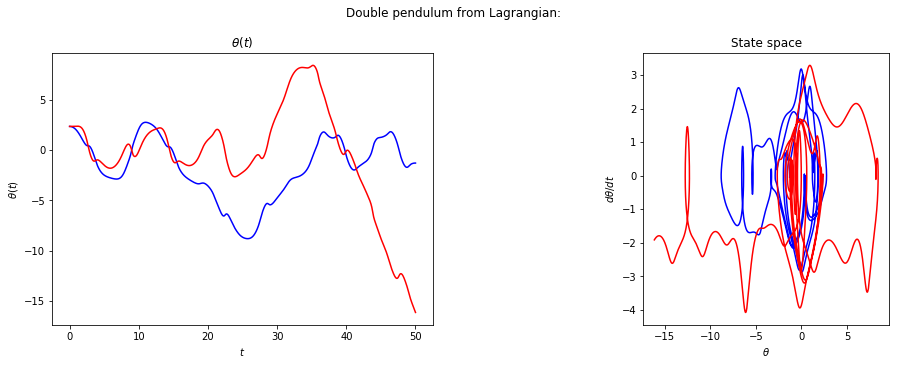

In [36]:
#Initial conditions for the plots
theta1_0 = (3./4.)*np.pi
theta1_dot_0 = 0.
theta2_0 = (3./4.)*np.pi
theta2_dot_0 = 0.
theta1, theta1_dot, theta2, theta2_dot = p1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)


#plotting
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  '
fig.suptitle(overall_title, va='baseline')
    
# first plot: theta vs time plot 
ax_a = fig.add_subplot(1,2,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop],
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\theta(t)$', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=None, 
            title=r'$\theta(t)$', 
            ax=ax_a) 

#second plot: state-space plot
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(theta1[start : stop], theta1_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title='State space', 
            ax=ax_c)   
plot_y_vs_x(theta2[start : stop], theta2_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title='State space', 
            ax=ax_c) 

These plots show the two pendula and how they move through time.

## Plot for Chaos
A small perturbation should result in chaotic motion:

In [37]:
#Initial Conditions with small perturbations
theta1_other_0 = theta1_0 +0.0001
theta2_other_0 = theta2_0 + 0.0001

theta1_other, theta1_other_dot, theta2_other, theta2_other_dot = p1.solve_ode(t_pts, theta1_other_0, theta1_dot_0, theta2_other_0, theta2_dot_0)

Text(0, 0.5, 'theta difference')

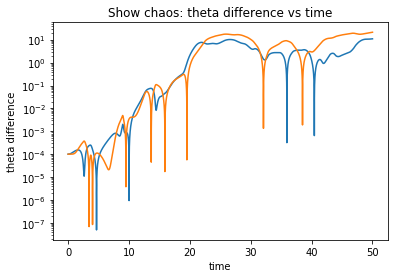

In [39]:
#Difference and plot
theta1c = abs(theta1-theta1_other)
theta2c = abs(theta2-theta2_other)

plt.semilogy(t_pts, theta1c)
plt.semilogy(t_pts, theta2c)
plt.title('Show chaos: theta difference vs time')
plt.xlabel('time')
plt.ylabel('theta difference')

This plot shows the difference between the original pendula and the same pendula with their angles slightly perturbed. As we can see, the difference between the two angles after a certain amount of time is massive. This sensitivity to initial conditions shows that the system is chaotic.